In [1]:
import numpy as np
import sklearn
import shap
import time
import torch
import pandas as pd
from Data import CSVData
import matplotlib.pyplot as plt

In [2]:
if torch.cuda.is_available():
    device='cuda'
else:
    device='cpu'

In [3]:
features = ['mode',
'Msim',
'Gsim',
'weight',
'pz_in1',
'pid_in1', 
'pz_in2',
'pid_in2',
'px_out1',
'py_out1',
'pz_out1',
'e_out1',
'pid_out1',
'px_out2',
'py_out2',
'pz_out2',
'e_out2',
'pid_out2',
'px_out3',
'py_out3',
'pz_out3',
'e_out3',
'pid_out3',
'px_out4',
'py_out4',
'pz_out4',
'e_out4',
'pid_out4',
'Mtarget',
'Gtarget',]
label = 'f_rwt'
features_to_rescale = ['Msim',
'Gsim',
'pz_in1', 
'pz_in2',
'px_out1',
'py_out1',
'pz_out1',
'e_out1',
'px_out2',
'py_out2',
'pz_out2',
'e_out2',
'px_out3',
'py_out3',
'pz_out3',
'e_out3',
'px_out4',
'py_out4',
'pz_out4',
'e_out4',
'Mtarget',
'Gtarget']

In [4]:
model_path = '/raid/projects/asinha15/VLQ-NN-Reweighting/trained_models/model_scripted6.pt'
model = torch.jit.load(model_path).to(device)
model.eval()

RecursiveScriptModule(
  original_name=Sequential
  (Linear0): RecursiveScriptModule(original_name=Linear)
  (Activation0): RecursiveScriptModule(original_name=LeakyReLU)
  (Linear1): RecursiveScriptModule(original_name=Linear)
  (Activation1): RecursiveScriptModule(original_name=LeakyReLU)
  (Linear2): RecursiveScriptModule(original_name=Linear)
  (Activation2): RecursiveScriptModule(original_name=LeakyReLU)
  (Linear_last): RecursiveScriptModule(original_name=Linear)
  (Activation_last): RecursiveScriptModule(original_name=LeakyReLU)
)

In [5]:
def f(X):
    inputs = torch.Tensor(X).to(device)
    with torch.no_grad():
        outputs = model(inputs).to('cpu').numpy().flatten()
    return outputs

In [6]:
train_data = CSVData(batch_size=1024, features_name=features, labels_name=label, features_to_rescale= features_to_rescale, file_names=['/raid/projects/asinha15/train_' + str(i)+'.csv' for i in range(0,10)])

In [7]:
X, Y = train_data.load_data_many()
X = pd.DataFrame(np.array(X))
Y = Y.flatten()
X.columns = features

In [8]:
shap.initjs()

explainer = shap.SamplingExplainer(f, X.sample(n=100))
shap_values = explainer.shap_values(X.iloc[299,:])
shap.force_plot(explainer.expected_value, shap_values, X.iloc[299,:])

In [9]:
import warnings

warnings.filterwarnings('ignore')

In [10]:
X_subset=X.sample(n=2000) #finding the shap values for 2000 events
shap_values2000 = explainer.shap_values(X_subset, np_samples=50)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [11]:
warnings.filterwarnings('default')

In [12]:
#shap.force_plot(explainer.expected_value, shap_values2000, X_subset)

In [13]:
X_subset = X_subset.reset_index()

In [14]:
del X_subset['index']

In [23]:
X_subset

,mode,Msim,Gsim,weight,pz_in1,pid_in1,pz_in2,pid_in2,px_out1,py_out1,...,pz_out3,e_out3,pid_out3,px_out4,py_out4,pz_out4,e_out4,pid_out4,Mtarget,Gtarget
0,-1.0,1100.0,275.0,0.363403,945.787148,21.0,-1113.675125,1.0,76.505225,13.861686,...,100.937765,424.914038,-5.0,-251.465335,20.514988,-7.366792,252.452053,5.0,1200.0,480.0
1,1.0,1300.0,650.0,0.124393,3368.481222,1.0,-944.027152,21.0,-69.459202,-40.350018,...,-731.180452,881.845101,-6.0,-8.494332,12.790619,-47.420977,50.065883,5.0,1400.0,700.0
2,-1.0,1100.0,275.0,0.363403,517.608654,21.0,-1767.813779,2.0,-86.026500,-28.127403,...,308.708833,474.418815,5.0,10.634995,-25.612624,42.886196,51.287673,-5.0,1300.0,390.0
3,0.0,1300.0,325.0,0.105190,579.549801,2.0,-359.286960,21.0,-11.744626,17.382297,...,-202.210899,265.562778,6.0,-127.966549,62.970528,-39.691378,148.115565,-5.0,1200.0,540.0
4,0.0,1100.0,275.0,0.232179,1216.607211,21.0,-881.015002,2.0,96.388920,-144.389156,...,418.414515,697.624334,6.0,-2.231757,13.964921,42.040544,44.603779,-5.0,1000.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.0,2300.0,1150.0,0.003120,1724.393930,2.0,-1168.331811,21.0,-56.006084,49.592518,...,-150.617792,915.124189,6.0,38.450805,-53.222173,-69.220629,95.523032,-5.0,2500.0,500.0
1996,-1.0,1100.0,275.0,0.363403,1728.450147,21.0,-2469.109951,-4.0,40.444474,-84.710994,...,-157.766080,480.815844,-5.0,-71.566461,-14.081760,1501.122012,1502.900343,5.0,1200.0,360.0
1997,1.0,1500.0,375.0,0.030697,1583.396628,21.0,-1640.796464,2.0,8.133584,31.518056,...,635.699840,944.343859,6.0,-5.730609,-1.083931,94.431029,94.727630,-5.0,1400.0,70.0
1998,1.0,1700.0,850.0,0.024110,1919.524818,2.0,-1431.463742,21.0,-83.204080,-45.451856,...,-257.943117,1125.127724,6.0,92.745401,-25.001339,-74.825997,121.851533,-5.0,1700.0,510.0


In [16]:
X_subset.shape

(2000, 30)

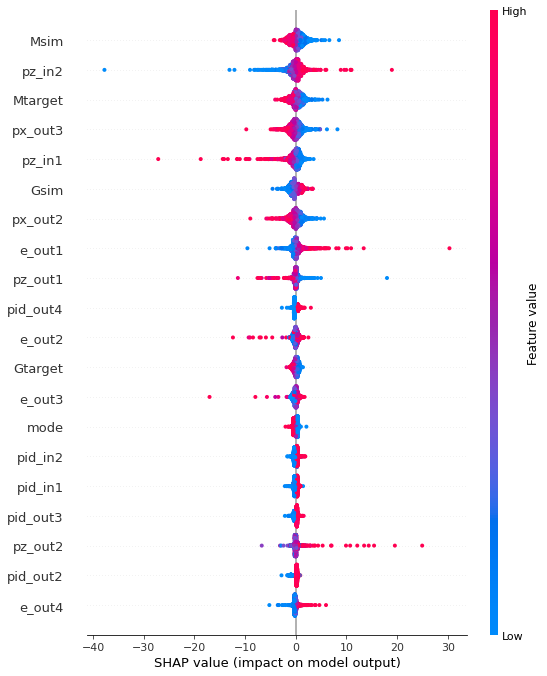

In [17]:
shap.summary_plot(shap_values2000, X_subset)

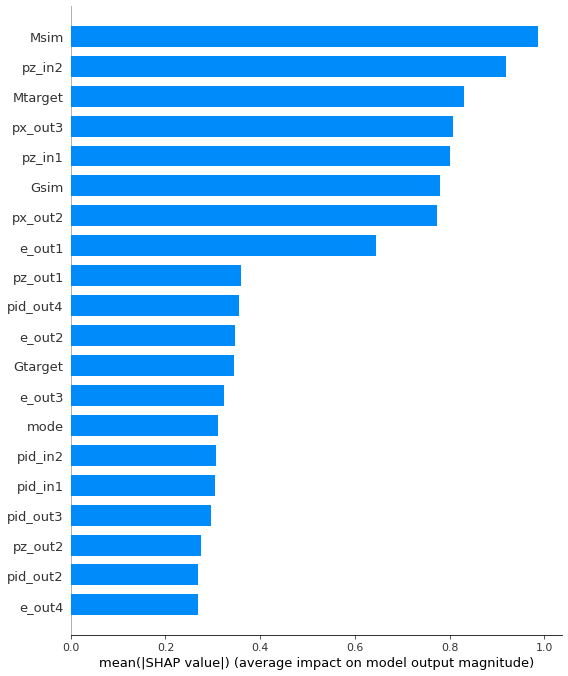

In [18]:
shap.summary_plot(shap_values2000, X_subset, plot_type='bar')

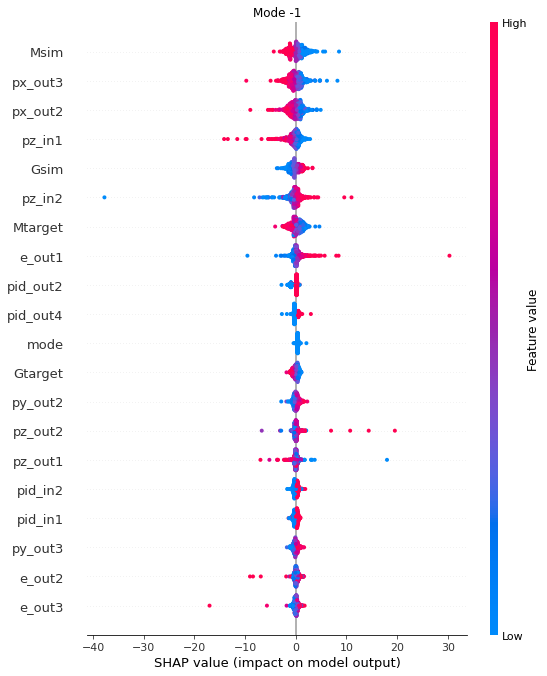

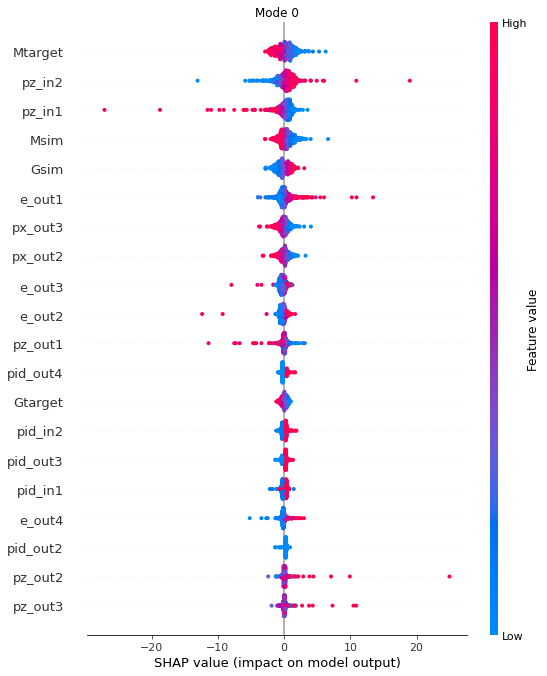

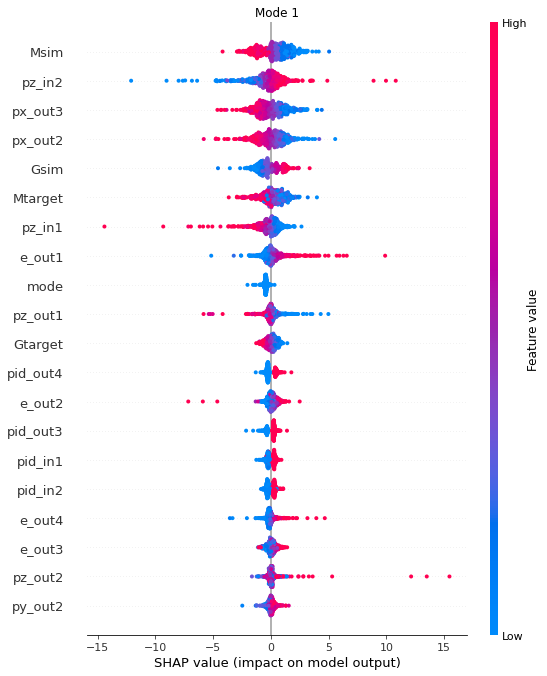

In [19]:
modes = [-1,0,1]
for i, b in enumerate(modes):
    plt.title(f"Mode {b}")
    idx = X_subset.index[X_subset['mode']==b].tolist()
    X_subsubset = pd.DataFrame([X_subset.iloc[idxi,:] for idxi in idx])
    shap.summary_plot(np.array([shap_values2000[idxi,:] for idxi in idx]), X_subsubset)
    del X_subsubset

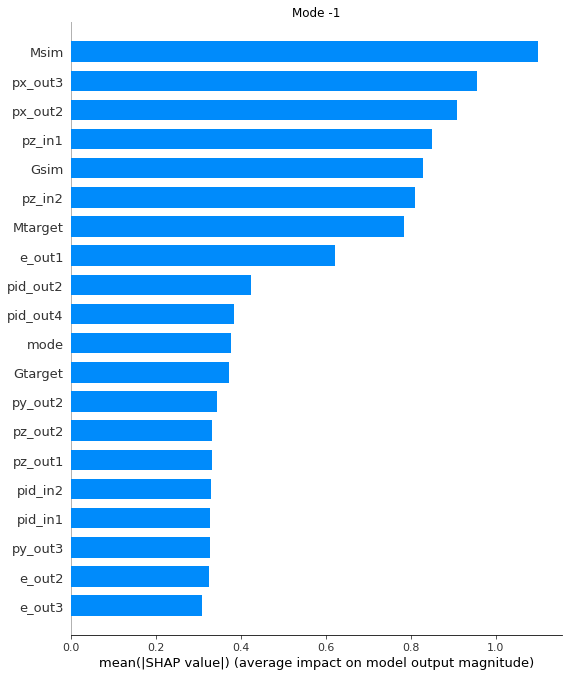

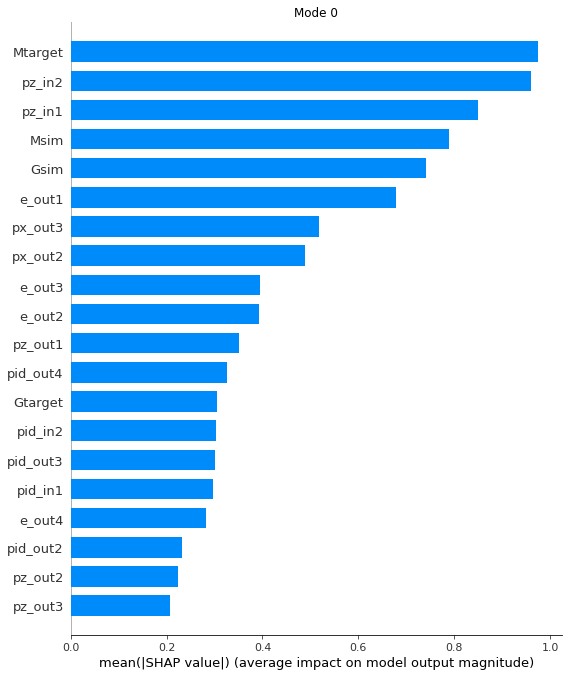

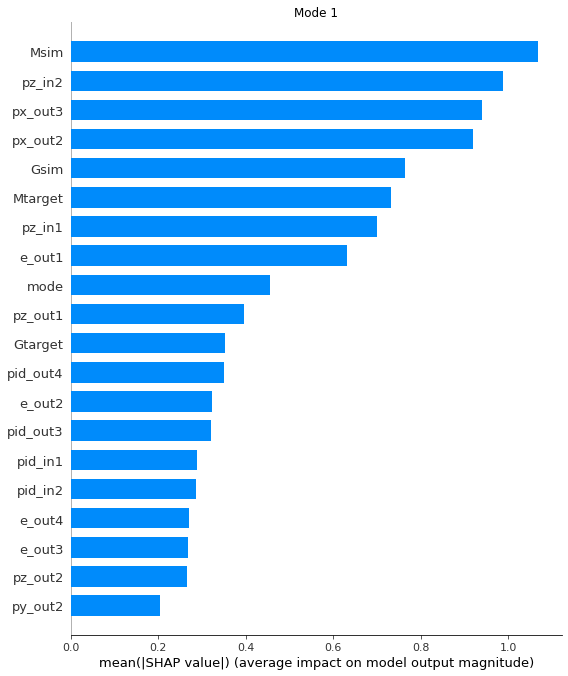

In [20]:
for i, b in enumerate(modes):
    plt.title(f"Mode {b}")
    idx = X_subset.index[X_subset['mode']==b].tolist()
    X_subsubset = pd.DataFrame([X_subset.iloc[idxi,:] for idxi in idx])
    shap.summary_plot(np.array([shap_values2000[idxi,:] for idxi in idx]), X_subsubset, plot_type='bar')
    del X_subsubset

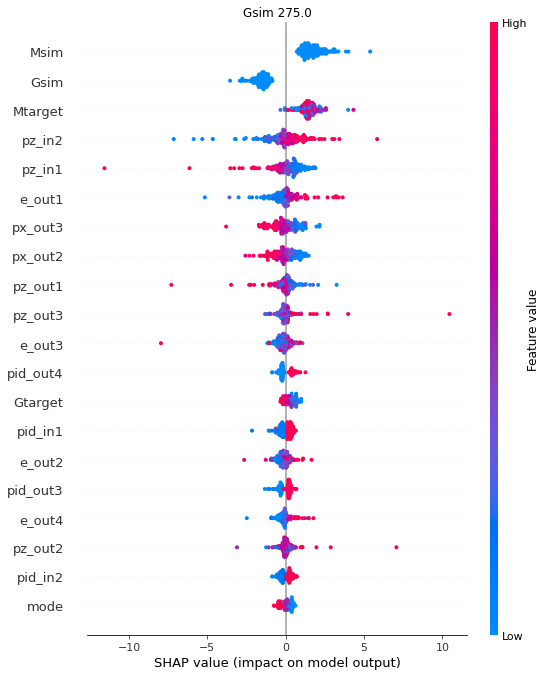

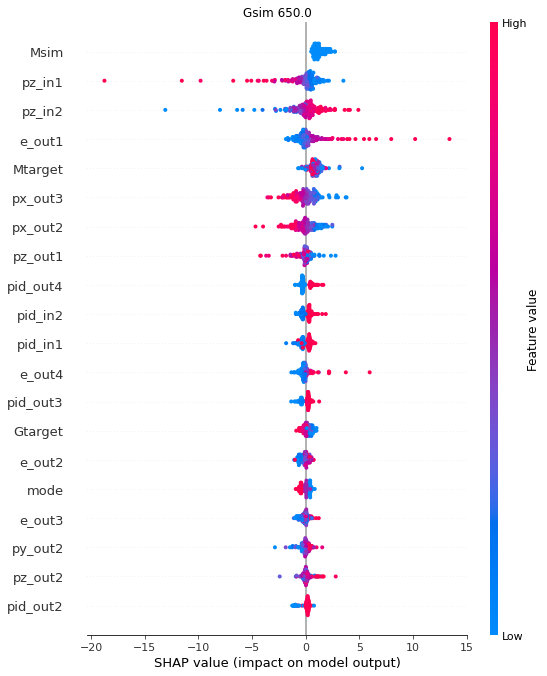

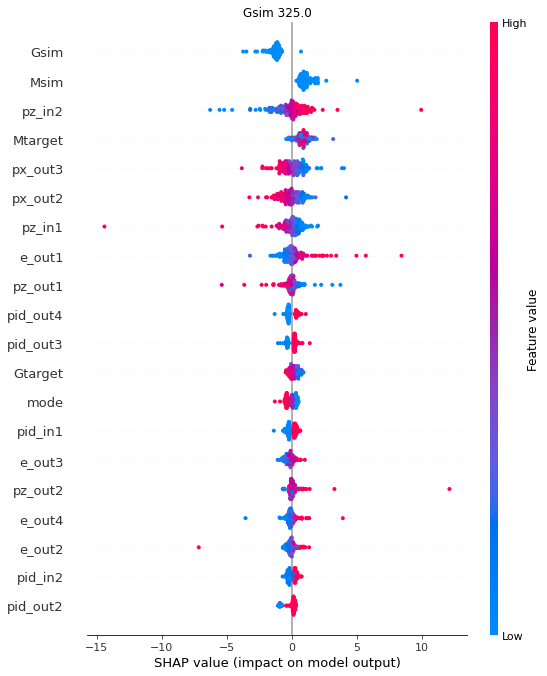

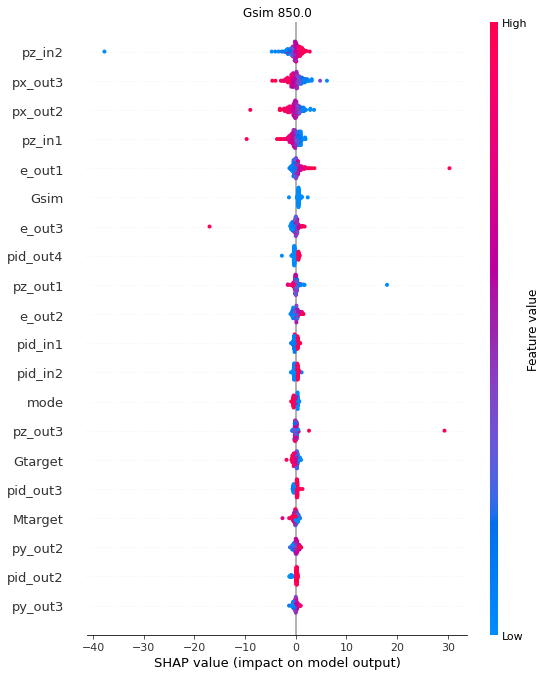

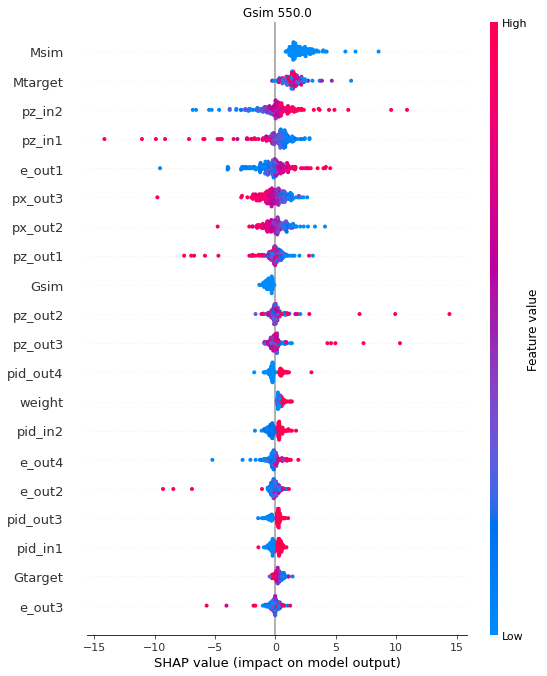

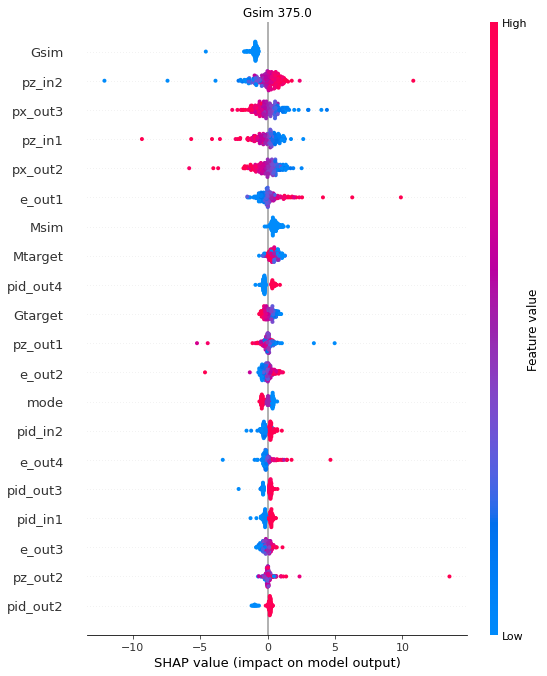

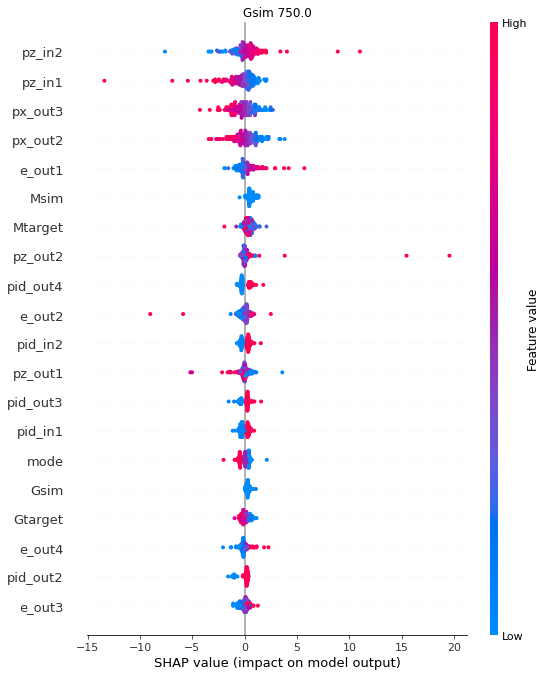

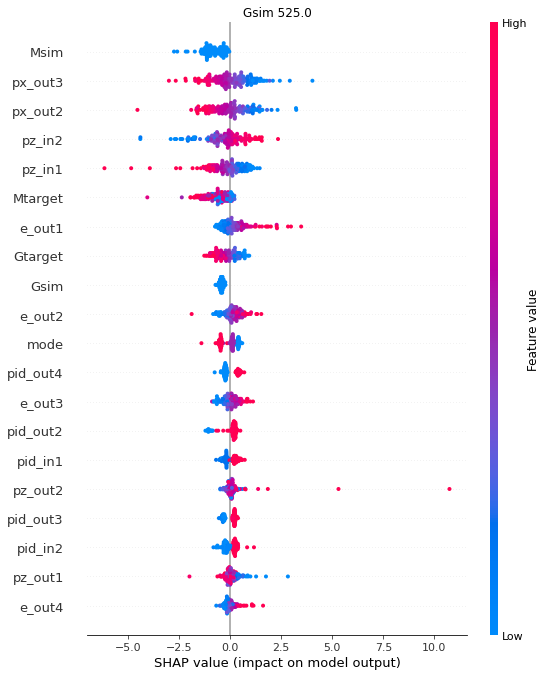

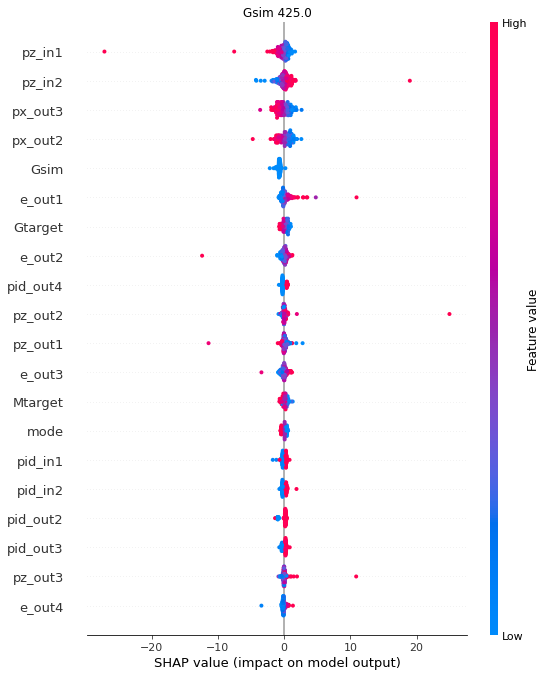

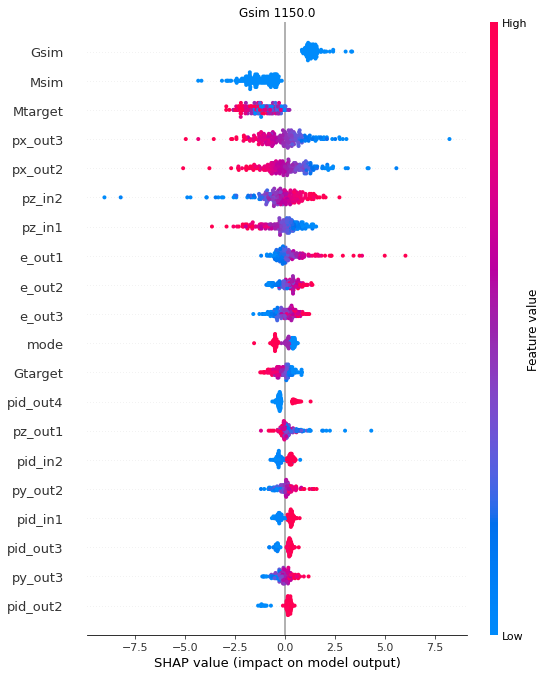

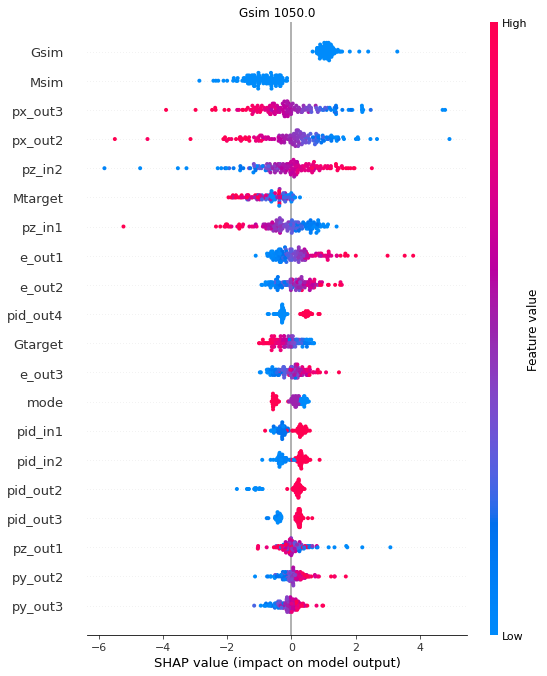

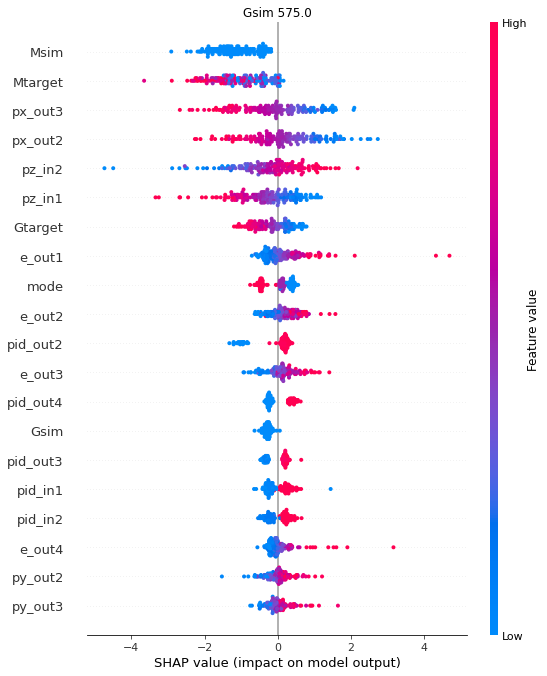

In [21]:
Gsims = X_subset.Gsim.unique()
for i, b in enumerate(Gsims):
    plt.title(f"Gsim {b}")
    idx = X_subset.index[X_subset['Gsim']==b].tolist()
    X_subsubset = pd.DataFrame([X_subset.iloc[idxi,:] for idxi in idx])
    shap.summary_plot(np.array([shap_values2000[idxi,:] for idxi in idx]), X_subsubset)
    del X_subsubset

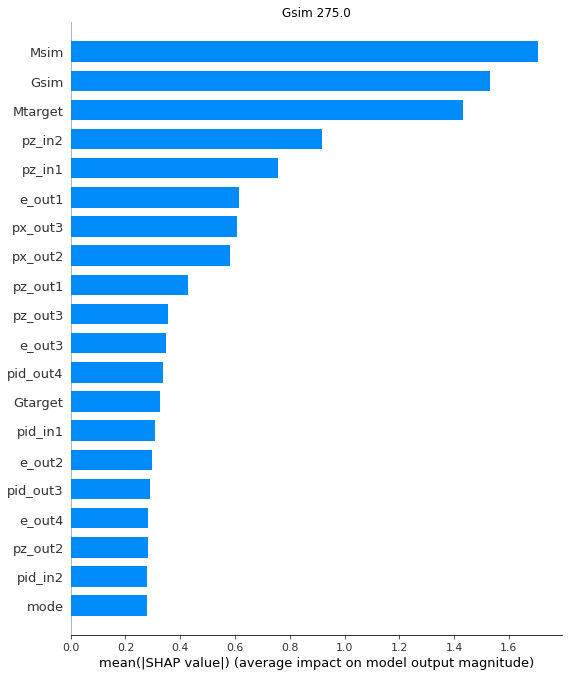

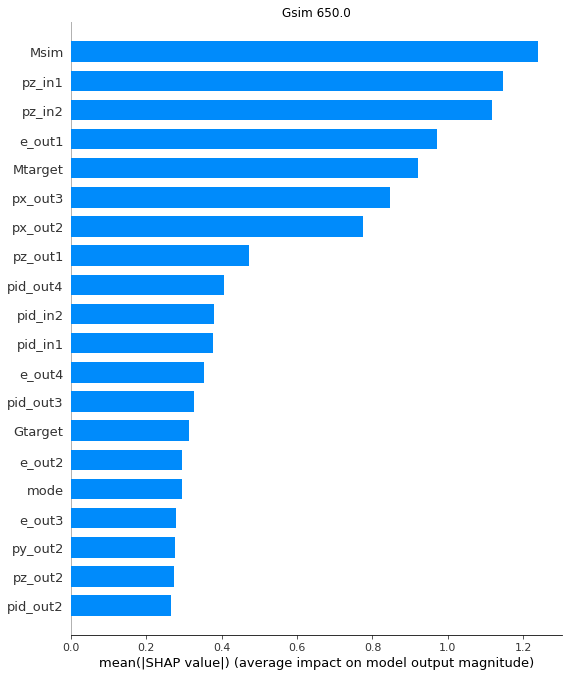

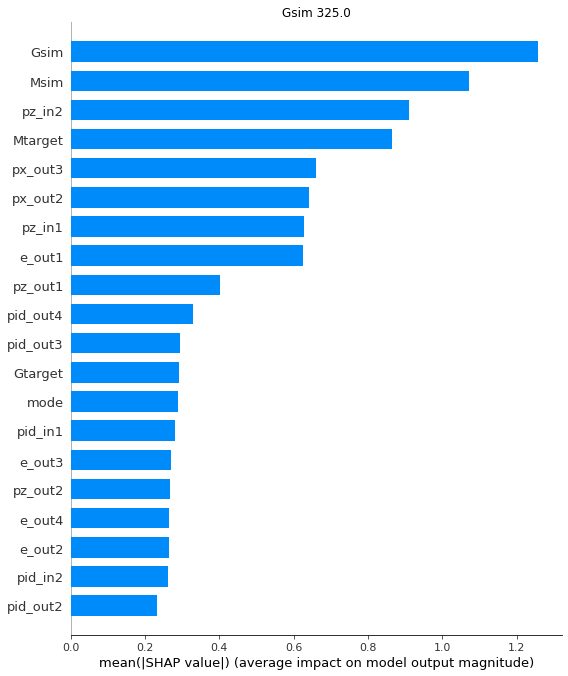

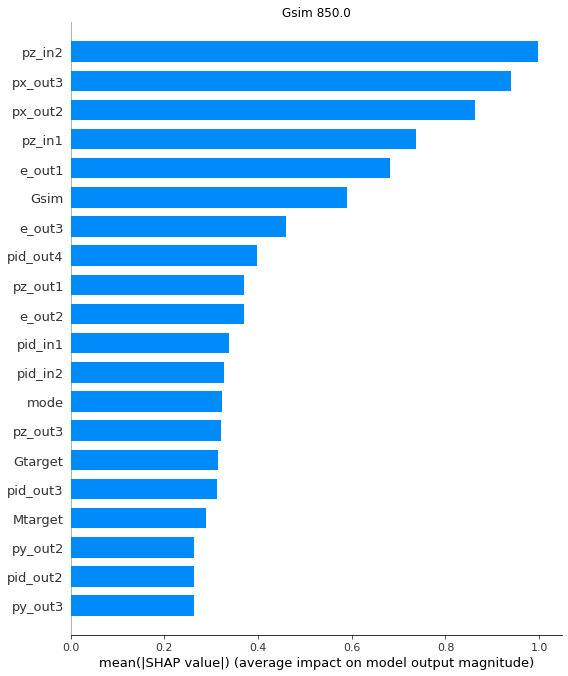

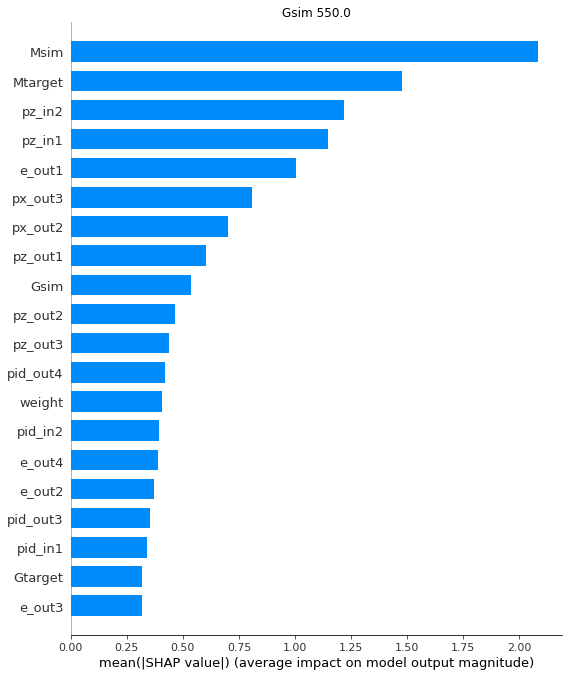

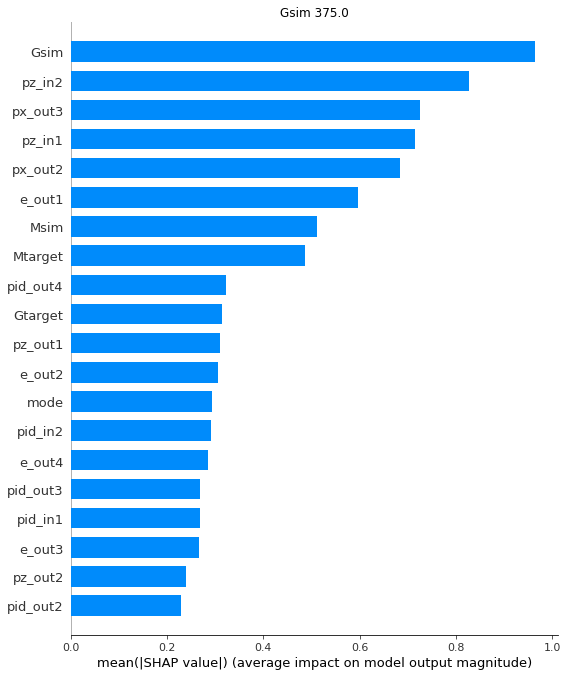

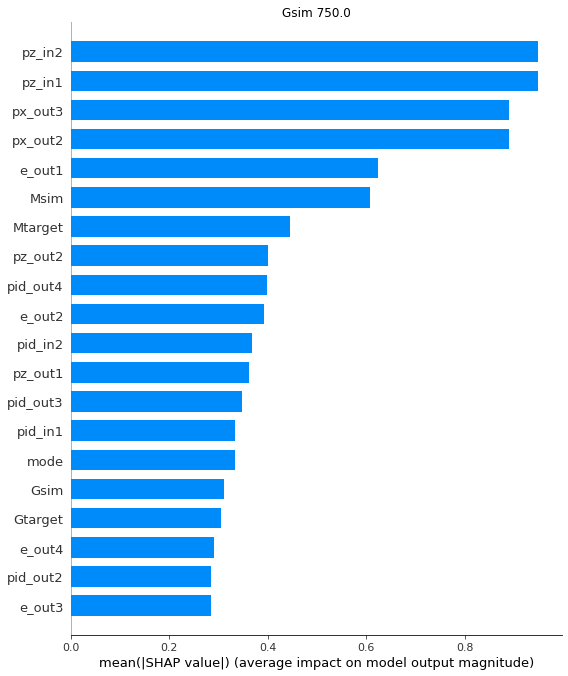

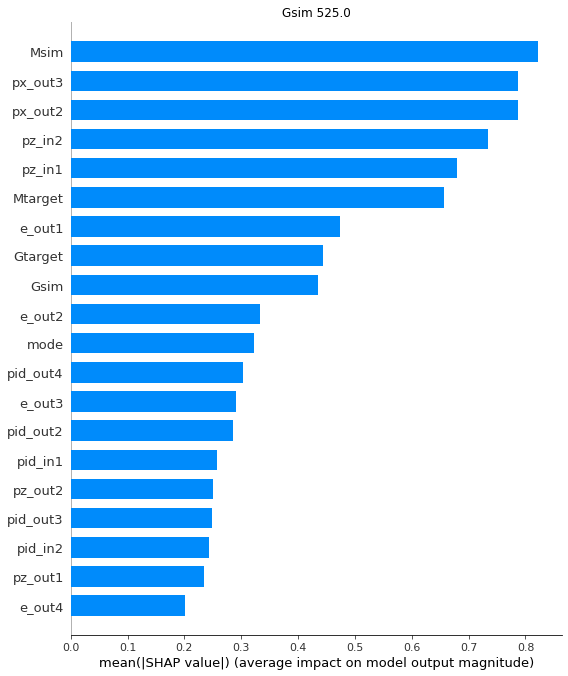

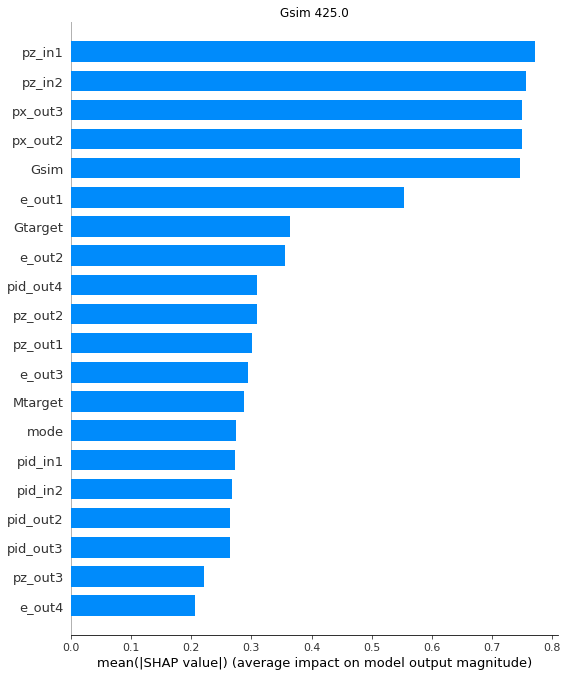

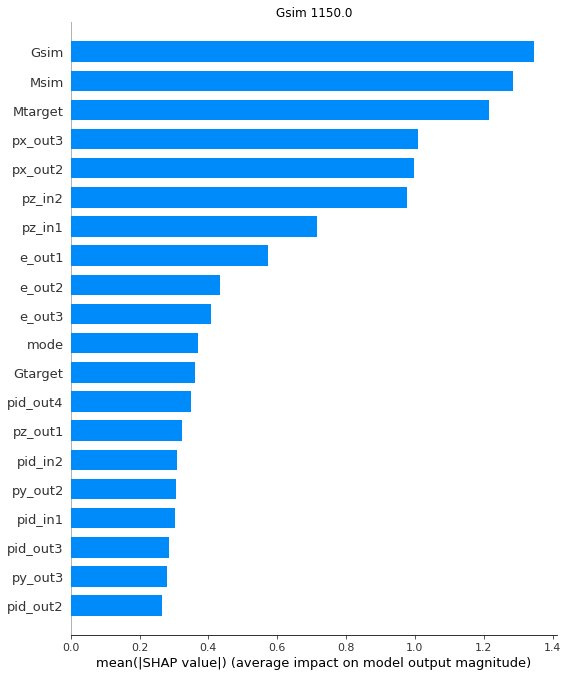

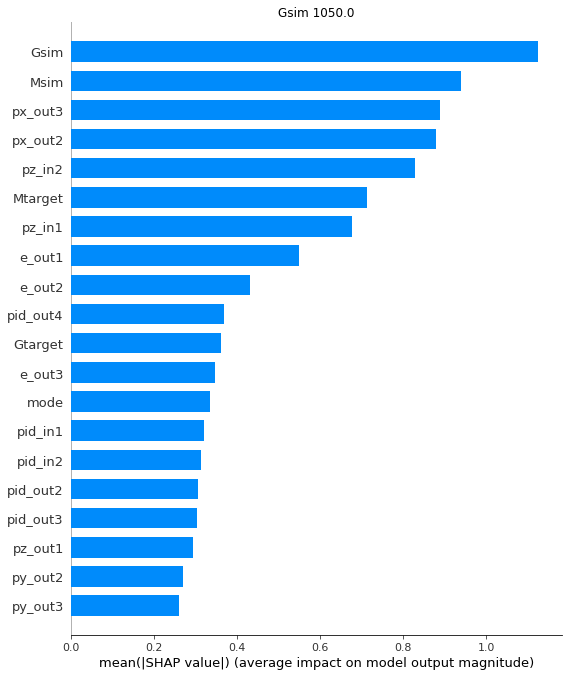

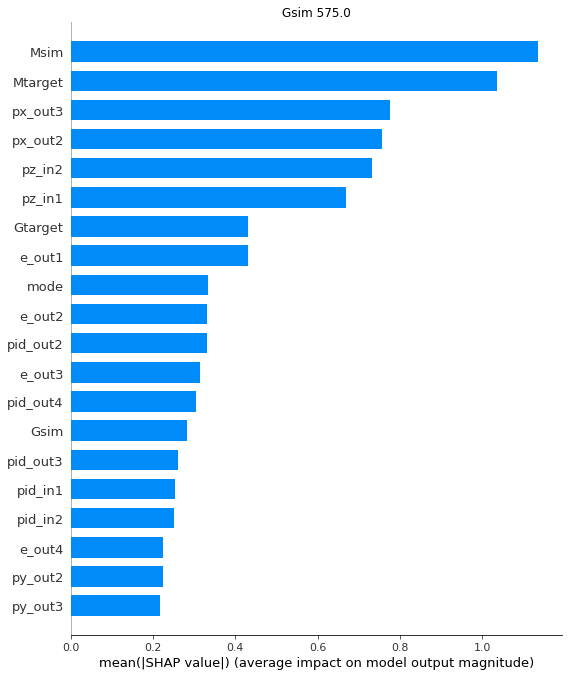

In [22]:
for i, b in enumerate(Gsims):
    plt.title(f"Gsim {b}")
    idx = X_subset.index[X_subset['Gsim']==b].tolist()
    X_subsubset = pd.DataFrame([X_subset.iloc[idxi,:] for idxi in idx])
    shap.summary_plot(np.array([shap_values2000[idxi,:] for idxi in idx]), X_subsubset, plot_type='bar')
    del X_subsubset

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

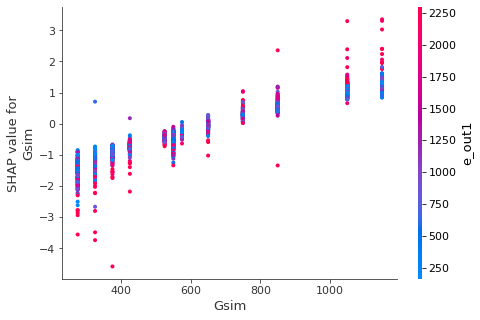

In [25]:
shap.dependence_plot('Gsim', shap_values2000, X_subset)

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

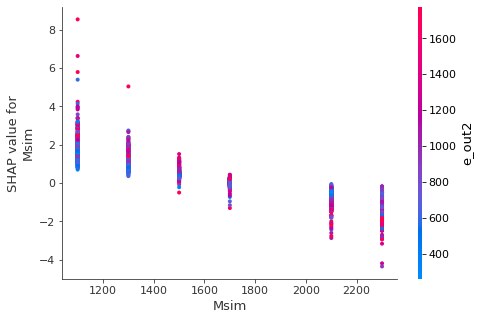

In [26]:
shap.dependence_plot('Msim', shap_values2000, X_subset)

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

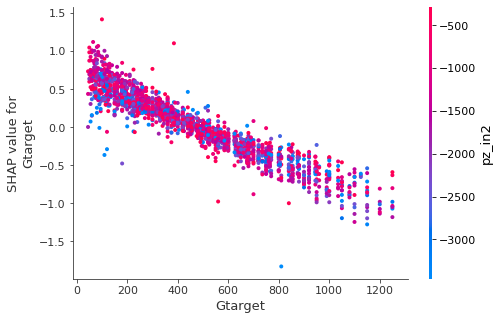

In [30]:
shap.dependence_plot('Gtarget', shap_values2000, X_subset)

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

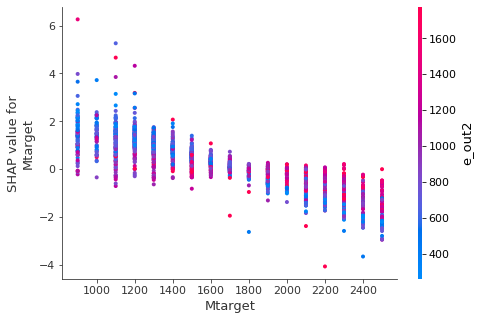

In [31]:
shap.dependence_plot('Mtarget', shap_values2000, X_subset)

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

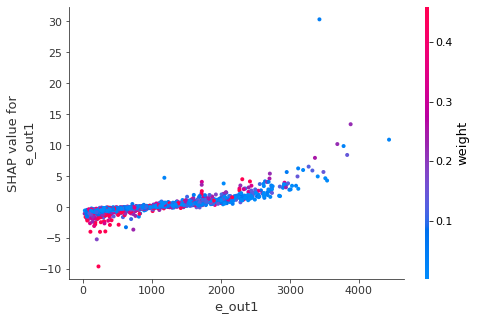

In [34]:
shap.dependence_plot('e_out1', shap_values2000, X_subset)